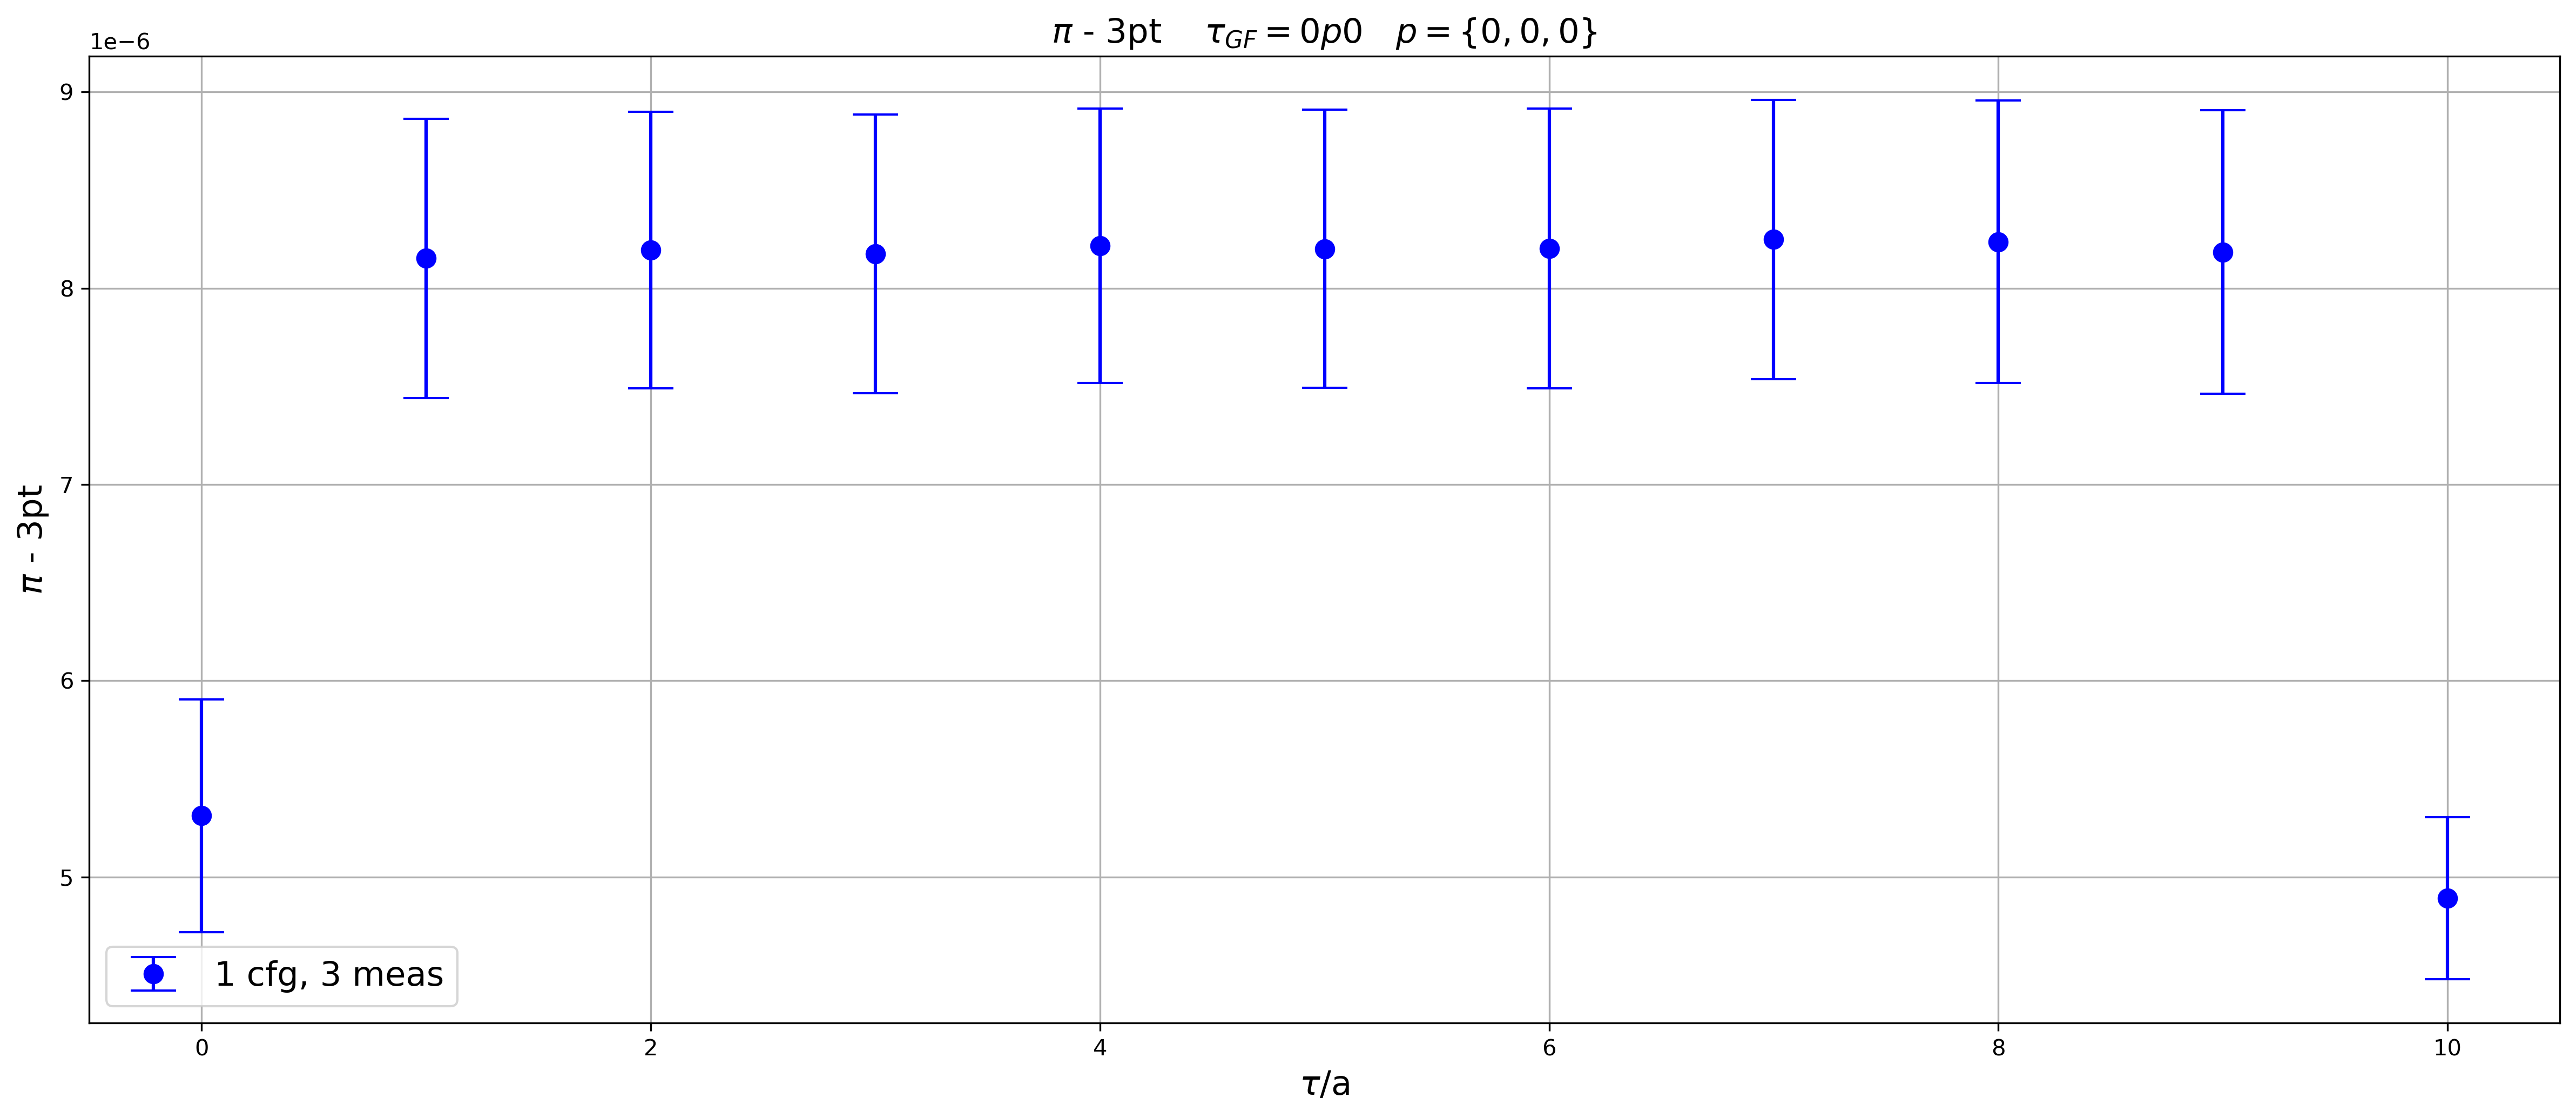

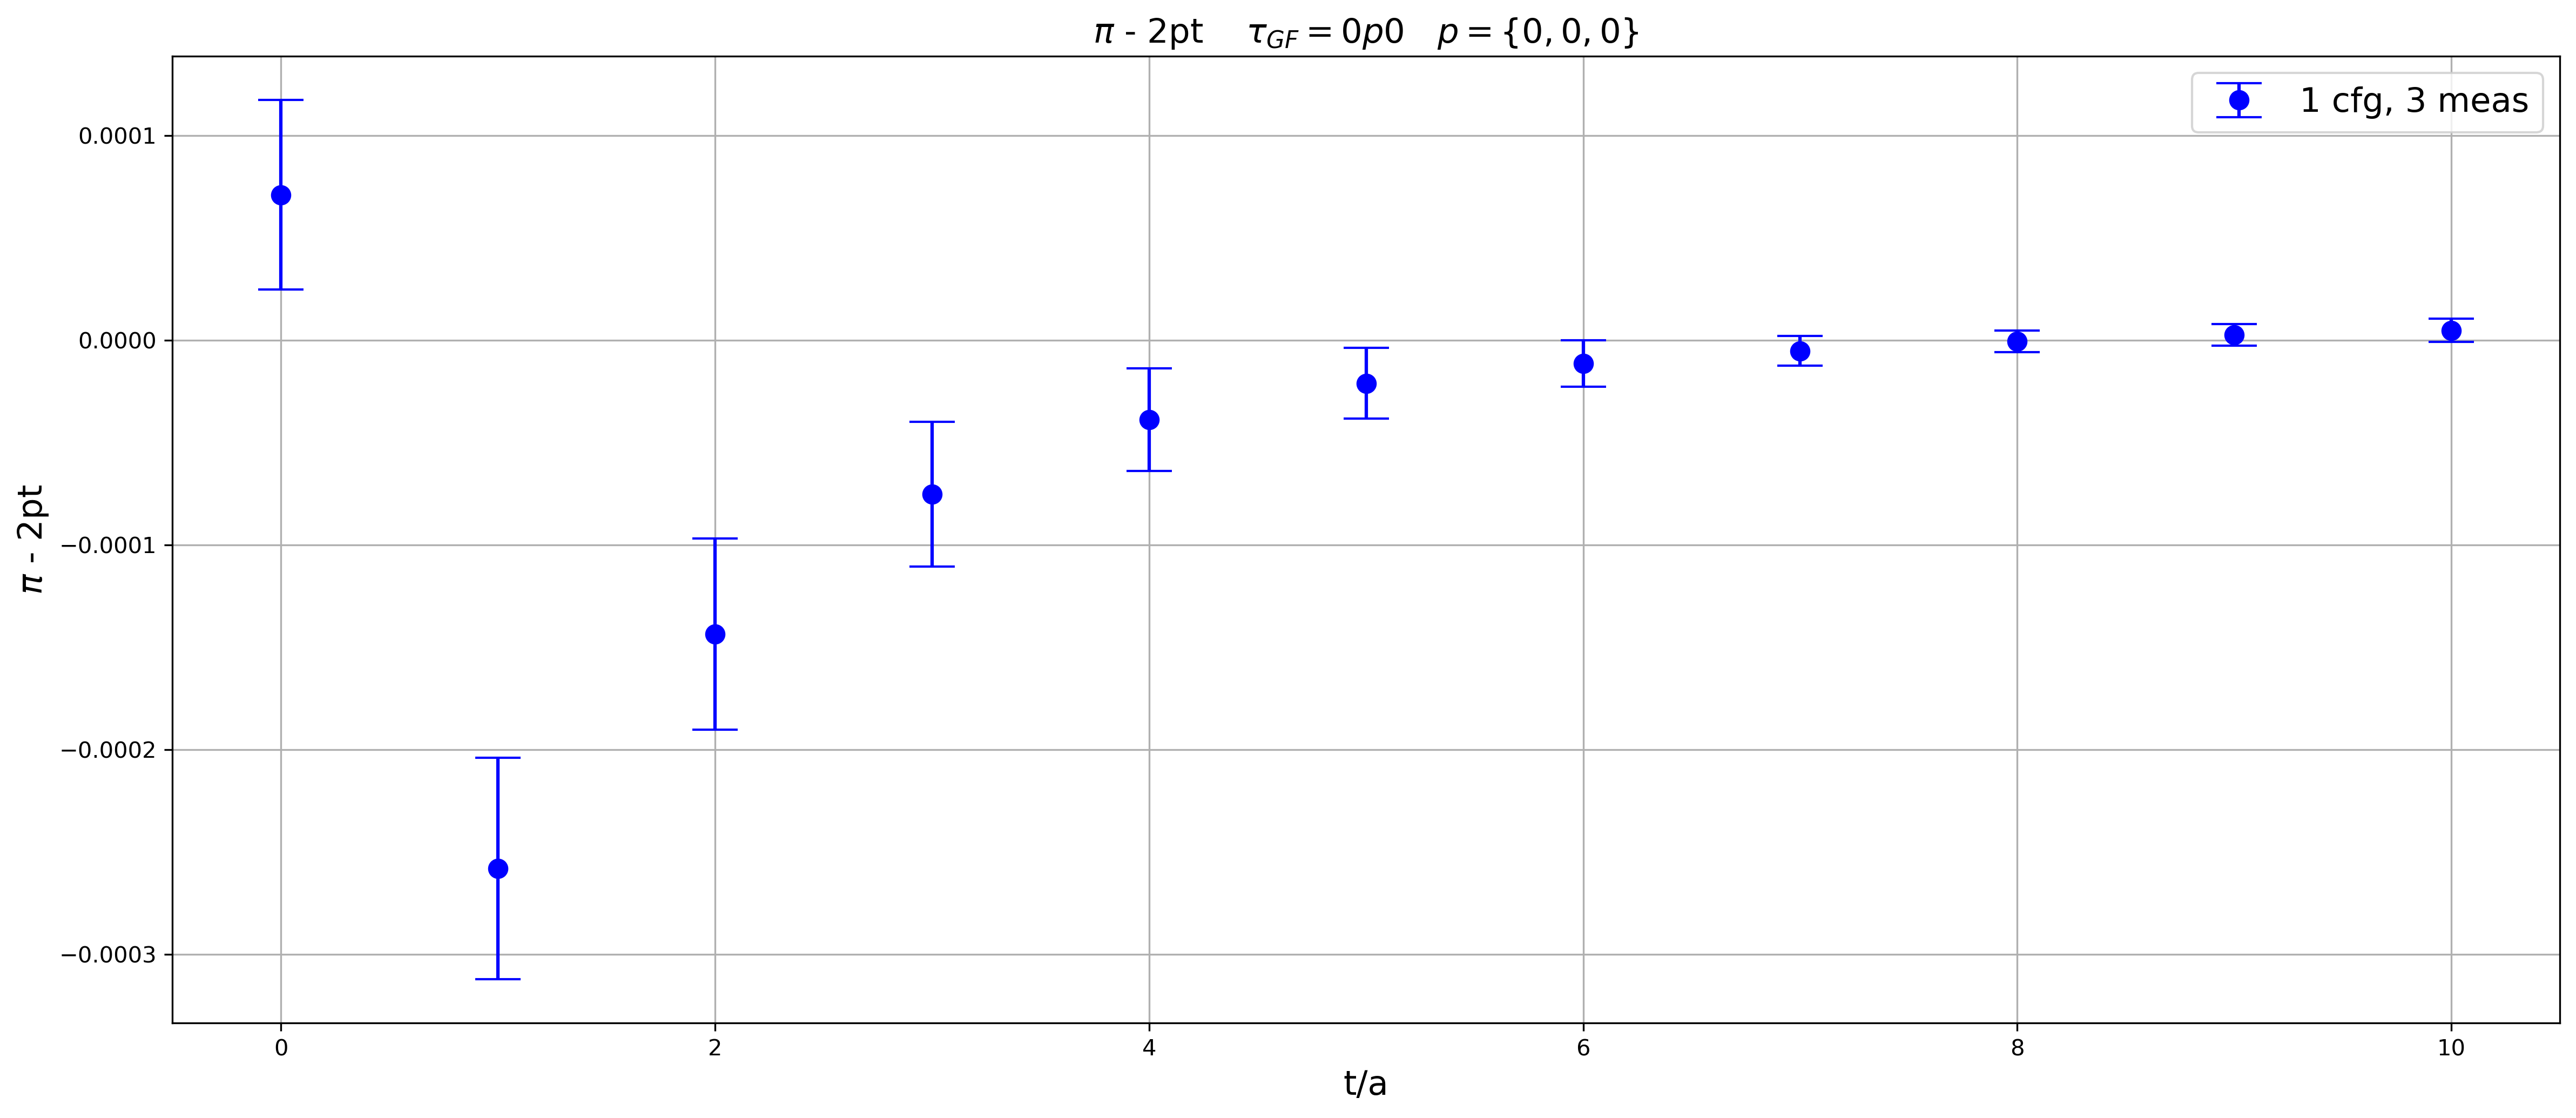

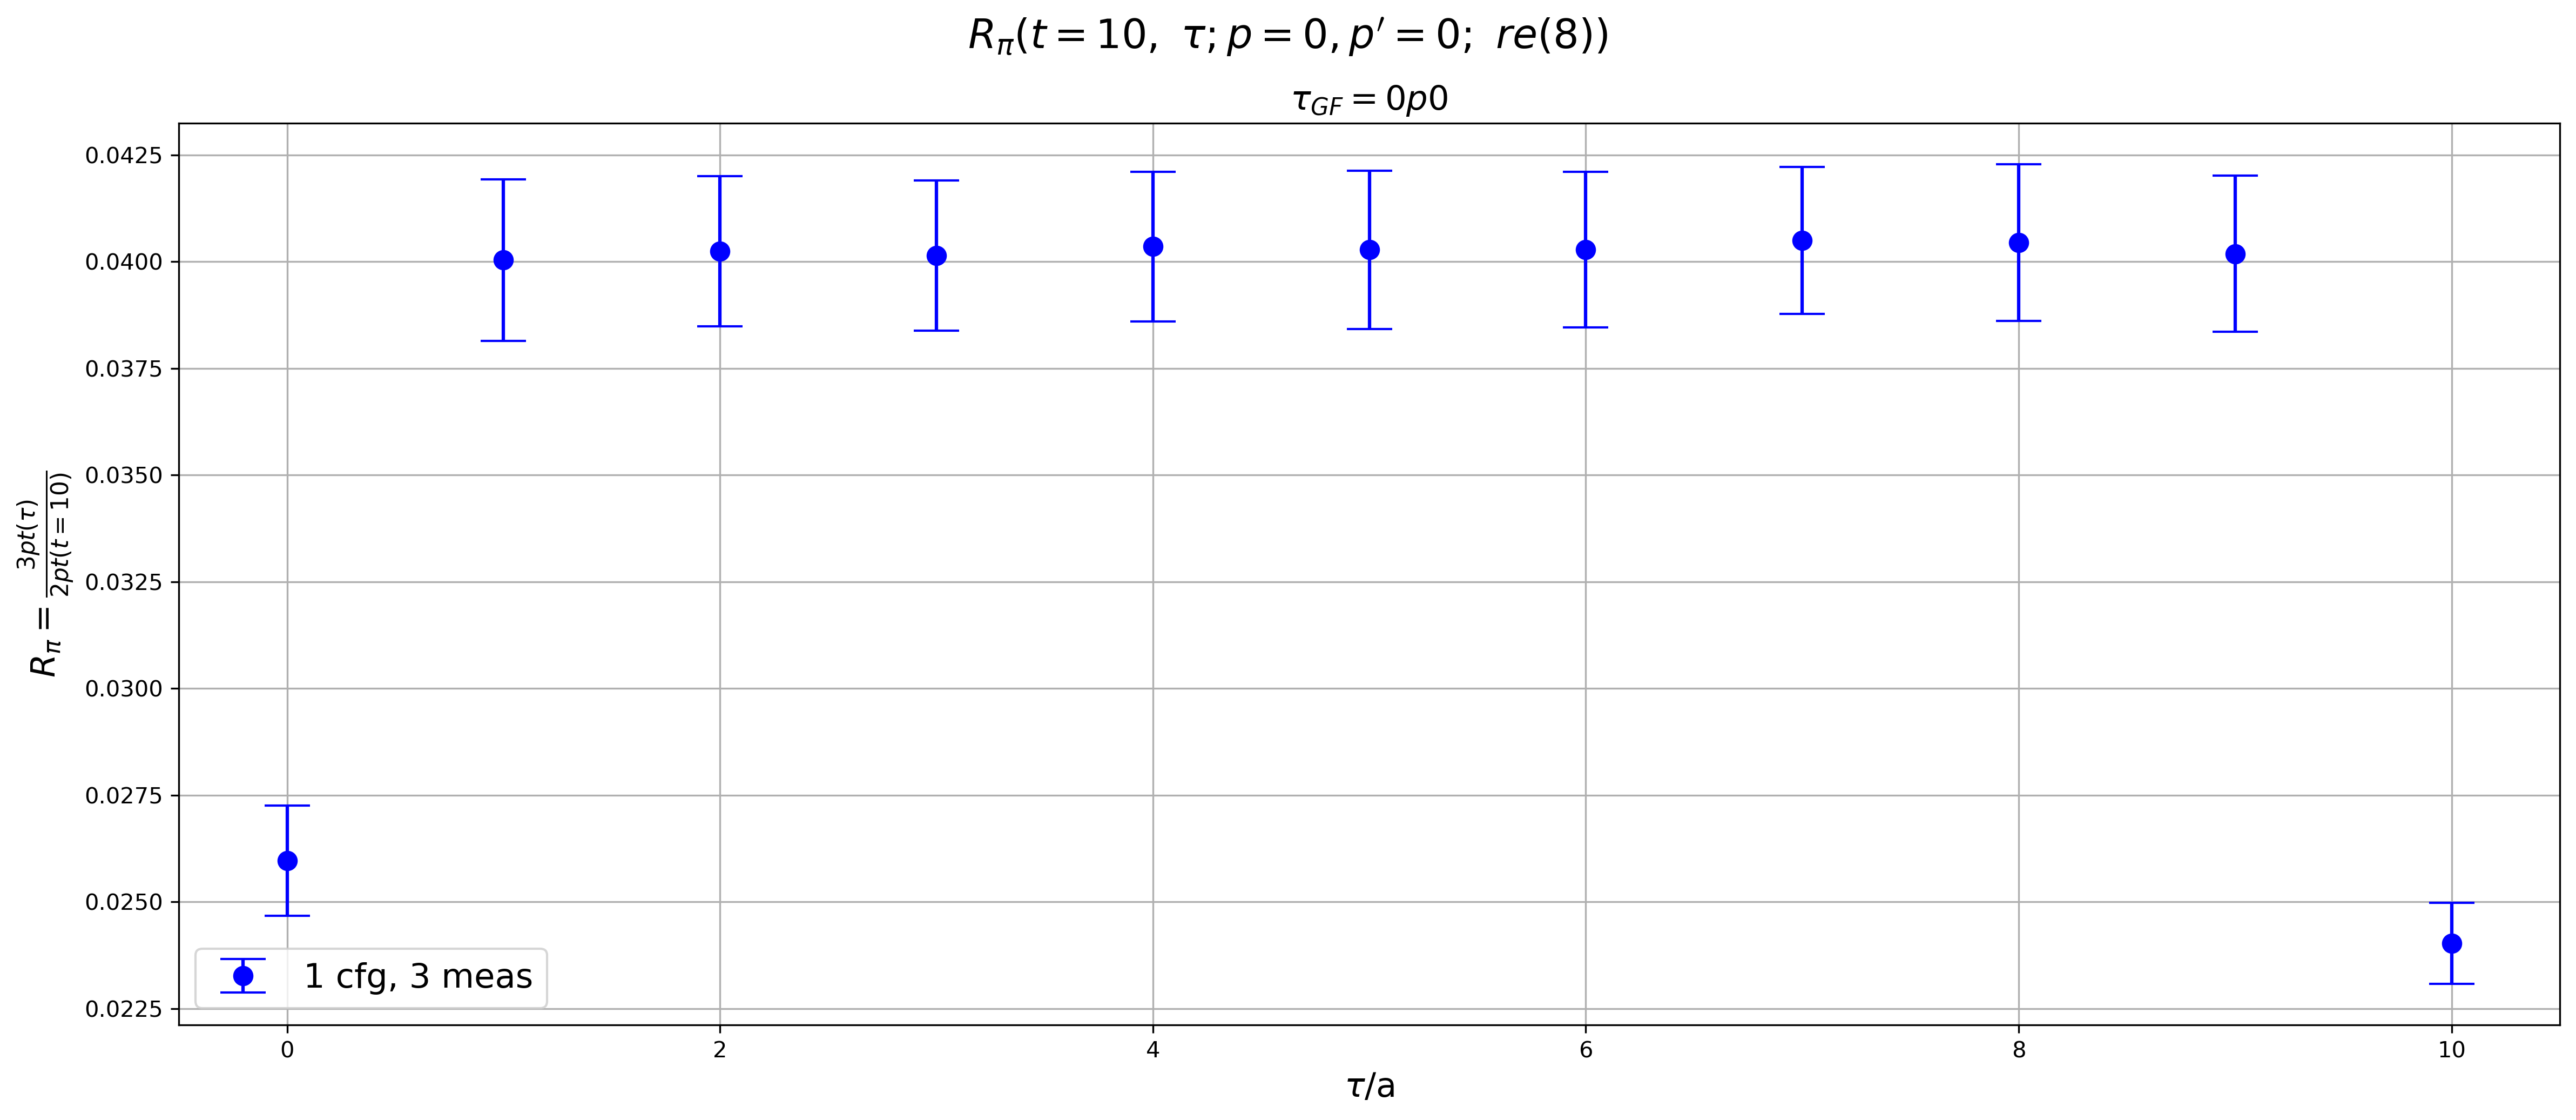

In [7]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py
# Parse the XML file


def Jackknife(datalist):
    N = len(datalist)
    theta_bar = np.mean(datalist)
    theta_nminus_theta_bar = []
    for i in range(len(datalist)): #Jackknife
        sliced_list = datalist[:(i)] + datalist[(i+1):]
        theta_n = np.mean(sliced_list)
        theta_nminus_theta_bar.append(np.square(theta_n-theta_bar))
    sigma_sq = ((N-1)/N)*np.sum(theta_nminus_theta_bar)
    return(theta_bar, np.sqrt(sigma_sq))


    
def plot_pion_ratio_3pt2pt_flow0(Gn, Num, snk_time, WFt):
    file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/pion_B.h5"
    
    with h5py.File(file_path, "r") as h5_file:
        path_to_observable_cfgb = f"//pion_l0_g{Gn}_qz+0_qy+0_qx+0/001"
        observable_cfgb = h5_file[path_to_observable_cfgb]
        values = observable_cfgb[Num][()]
    
    pt3_data = np.array(values)
    pt3_data1 = pt3_data[0:(snk_time+1)]
    pt3_data2 = pt3_data[42:(42+(snk_time+1))]
    pt3_data3 = pt3_data[84:(84+(snk_time+1))]
    
    #pt2_tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/FLOWED_{WFt}_hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_STOUSM.dat.xml")
    pt2_tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/FLOWED_{WFt}_hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_STOUSM.dat.xml")
    pt2_root = pt2_tree.getroot()
    pt2_values = []
    for elem in pt2_root.findall(".//Shell_Point_Wilson_Mesons/elem[gamma_value='15']/momenta/elem[sink_mom_num='0']/mesprop/"):
        pt2_Num_value = elem.find("re").text
        pt2_values.append(float(pt2_Num_value))
    pt2_data = np.array(pt2_values)
    pt2_data1 = pt2_data[(snk_time+1)]
    pt2_data2 = pt2_data[(42+(snk_time+1))]
    pt2_data3 = pt2_data[(84+(snk_time+1))]
    
    JK_value = []
    JK_err = []
    for tau in range(len(pt3_data1)):
        JK_value_err = Jackknife([pt3_data1[tau]/pt2_data1, pt3_data2[tau]/pt2_data2, pt3_data3[tau]/pt2_data3])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    
    time_plt = np.arange(len(pt3_data1))
    plt.figure(figsize=(16, 7), dpi=300)
    plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt='o', markersize=8, capsize=10, color='blue', label="1 cfg, 3 meas")
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("$R_{\\pi}=\\frac{3pt(\\tau)}{2pt(t=%s)}$"%(snk_time), fontsize=15)
    plt.suptitle("$R_{\\pi}(t=%s,~\\tau;p=0,p^{\\prime}=0;~%s (%s))$" % (snk_time,Num, Gn), fontsize=18)
    plt.title("$\\tau_{GF} = %s$"%(WFt), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.savefig("ReG8%s%s.pdf"%(snk_time,WFt), dpi=50000)
    plt.show()
    
    print(" ")


def plot_pion_2pt_flow0(snk_time, WFt):
    #tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/FLOWED_{WFt}_hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_STOUSM.dat.xml")
    tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/FLOWED_{WFt}_hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_STOUSM.dat.xml")
    root = tree.getroot()
    values = []
    for elem in root.findall(".//Shell_Point_Wilson_Mesons/elem[gamma_value='0']/momenta/elem[sink_mom_num='0']/mesprop/"):
        Num_value = elem.find("re").text
        values.append(float(Num_value))
    data = np.array(values)
    data1 = data[0:(snk_time+1)]
    data2 = data[42:(42+(snk_time+1))]
    data3 = data[84:(84+(snk_time+1))]
    JK_value = []
    JK_err = []
    for tau in range(len(data1)):
        JK_value_err = Jackknife([data1[tau], data2[tau], data3[tau]])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    time_plt = np.arange(len(data1))
    plt.figure(figsize=(16, 7),dpi=300)
    plt.errorbar(time_plt, JK_value, yerr = JK_err, fmt='o', markersize=8, capsize=10, color='blue', label= "1 cfg, 3 meas")
    plt.xlabel("t/a", fontsize=15)
    plt.ylabel("$\\pi$ - 2pt", fontsize=15)
    plt.title("$\\pi$ - 2pt    $\\tau_{GF} = %s$   $p=\{0,0,0\}$"%(WFt), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True) 
    plt.show()
    print(" ")

def plot_pion_3pt_flow0(Gn, Num, snk_time, WFt):
    file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/pion_B.h5"
    
    with h5py.File(file_path, "r") as h5_file:
        path_to_observable_cfgb = f"//pion_l0_g{Gn}_qz+0_qy+0_qx+0/001"
        observable_cfgb = h5_file[path_to_observable_cfgb]
        values = observable_cfgb[Num][()]
    
    data = np.array(values)
    data1 = data[0:(snk_time+1)]
    data2 = data[42:(42+(snk_time+1))]
    data3 = data[84:(84+(snk_time+1))]
    
    JK_value = []
    JK_err = []
    for tau in range(len(data1)):
        JK_value_err = Jackknife([data1[tau], data2[tau], data3[tau]])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    
    time_plt = np.arange(len(data1))
    plt.figure(figsize=(16, 7), dpi=300)
    plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt='o', markersize=8, capsize=10, color='blue', label="1 cfg, 3 meas")
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("$\\pi$ - 3pt", fontsize=15)
    plt.title("$\\pi$ - 3pt    $\\tau_{GF} = %s$   $p=\\{0,0,0\\}$"%(WFt), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    print(" ")

GF = "0p0"
sin_time = 10
Gamma = 8
G_nmu = "re"
plot_pion_3pt_flow0(Gamma, G_nmu,sin_time, GF)
plot_pion_2pt_flow0(sin_time, GF)
plot_pion_ratio_3pt2pt_flow0(Gamma, G_nmu,sin_time, GF)


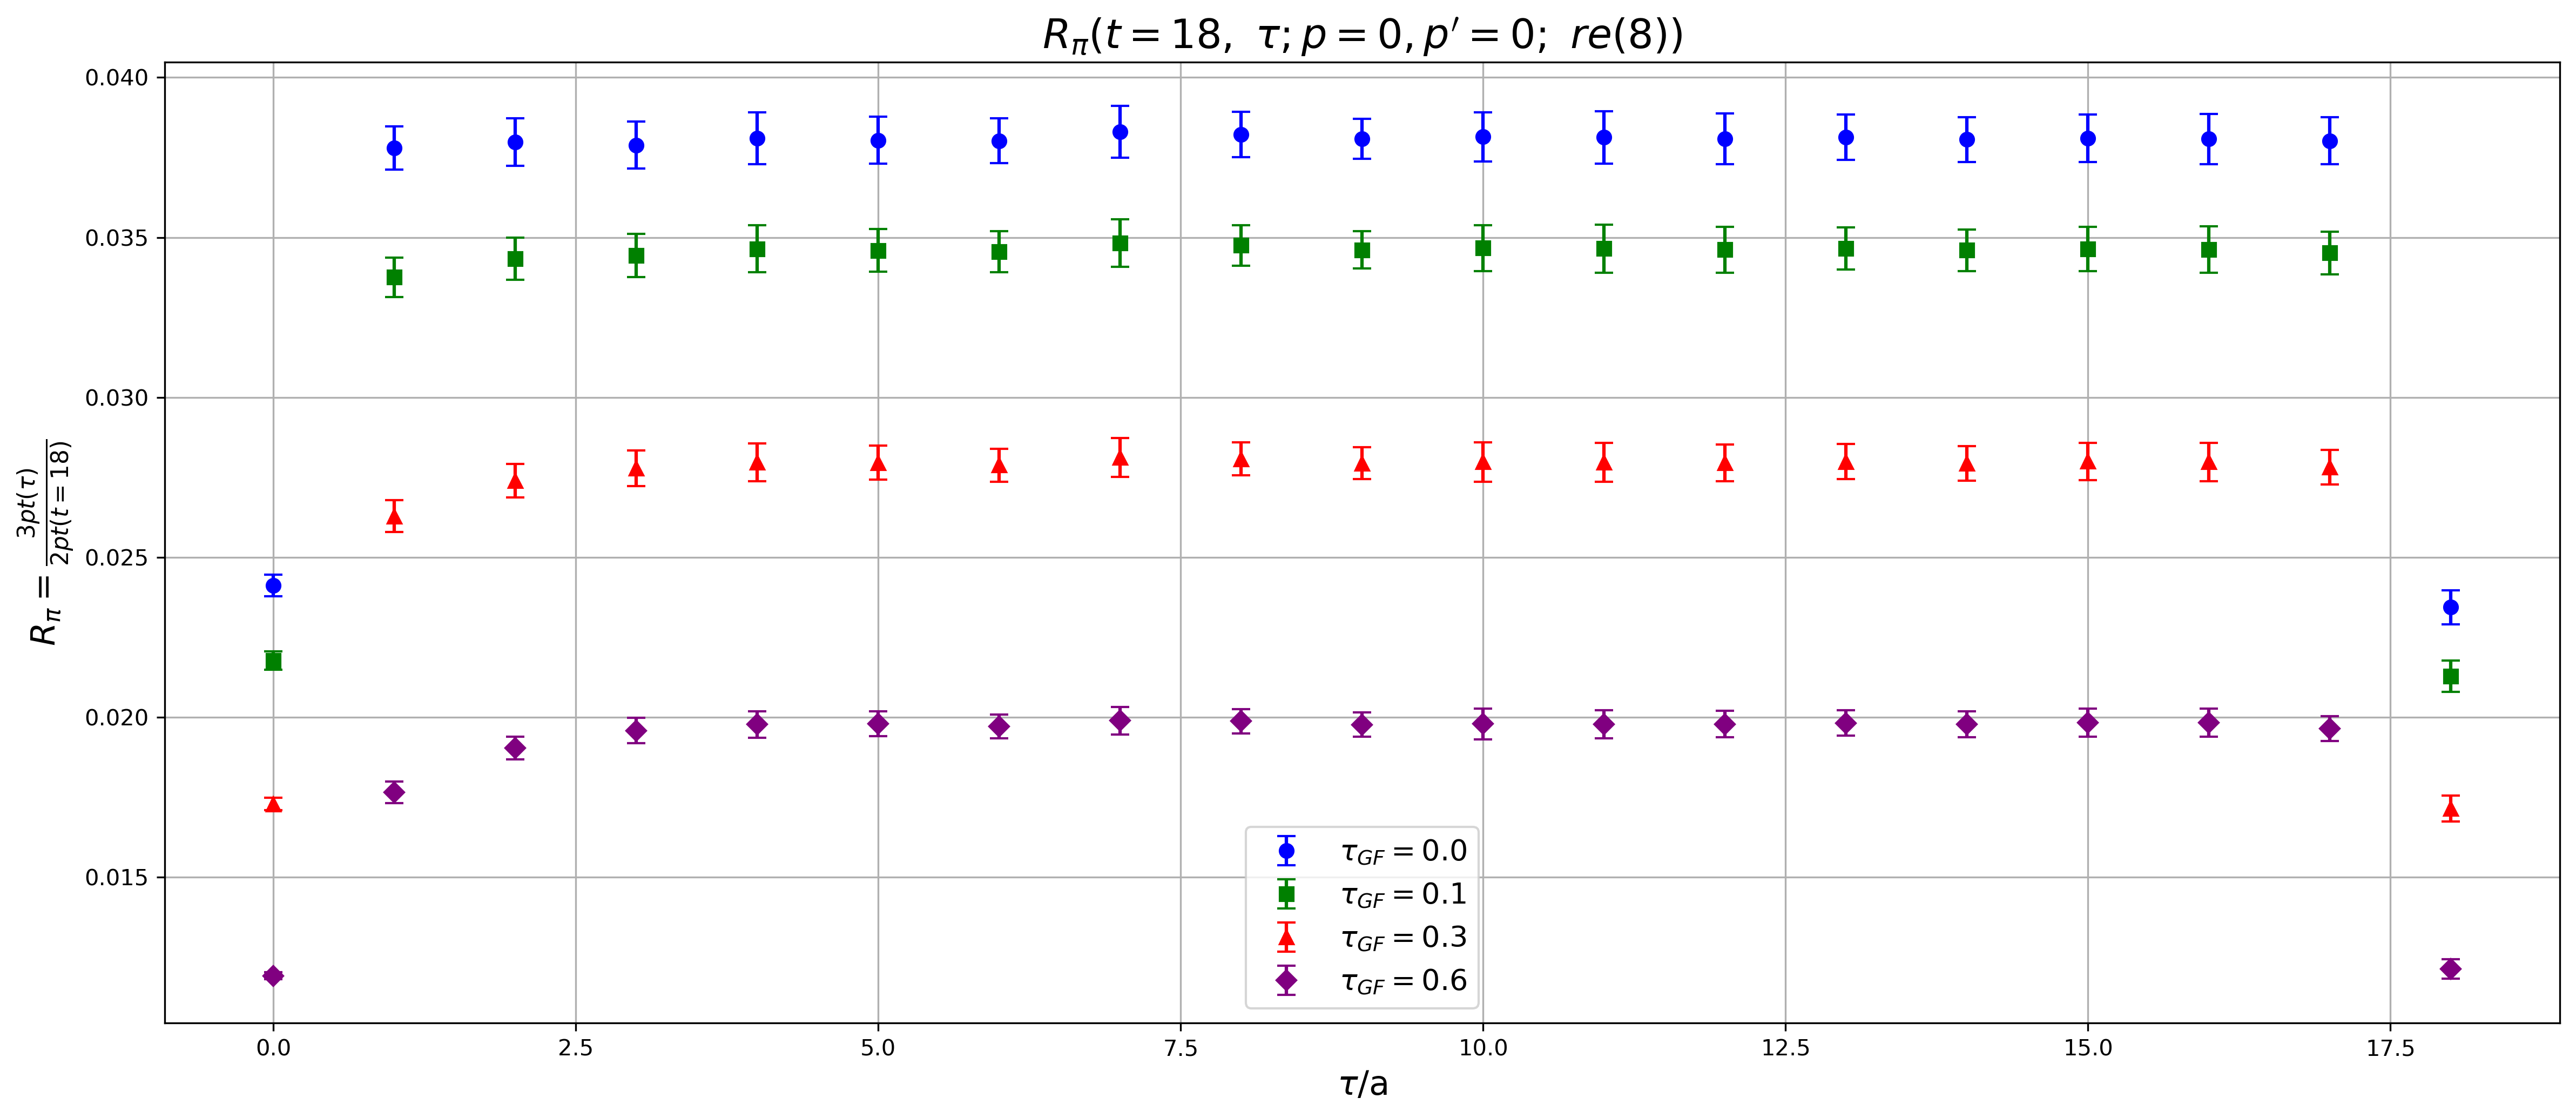

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

def plot_all_flows(Gn, Num, snk_time):
    flow_times = ["0p0", "0p1", "0p3", "0p6"]
    tau_GF = [0.0, 0.1, 0.3, 0.6]
    colors = ['blue', 'green', 'red', 'purple']
    markers = ['o', 's', '^', 'D']

    plt.figure(figsize=(16, 7), dpi=300)

    for i, WFt in enumerate(flow_times):
        # Load 3pt data
        file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_t{snk_time}_pion3pt.h5"
        with h5py.File(file_path, "r") as h5_file:
            path_to_observable_cfgb = f"//pion_l0_g{Gn}_qz+0_qy+0_qx+0/001"
            observable_cfgb = h5_file[path_to_observable_cfgb]
            values = observable_cfgb[Num][()]
        pt3_data = np.array(values)
        pt3_data1 = pt3_data[0:(snk_time+1)]
        pt3_data2 = pt3_data[42:(42+(snk_time+1))]
        pt3_data3 = pt3_data[84:(84+(snk_time+1))]

        # Load 2pt data
        pt2_tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/FLOWED_{WFt}_hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_STOUSM.dat.xml")
        pt2_root = pt2_tree.getroot()
        pt2_values = []
        for elem in pt2_root.findall(".//Shell_Point_Wilson_Mesons/elem[gamma_value='15']/momenta/elem[sink_mom_num='0']/mesprop/"):
            pt2_Num_value = elem.find("re").text
            pt2_values.append(float(pt2_Num_value))
        pt2_data = np.array(pt2_values)
        pt2_data1 = pt2_data[(snk_time+1)]
        pt2_data2 = pt2_data[(42+(snk_time+1))]
        pt2_data3 = pt2_data[(84+(snk_time+1))]

        # Compute jackknife
        JK_value = []
        JK_err = []
        for tau in range(len(pt3_data1)):
            JK_value_err = Jackknife([pt3_data1[tau]/pt2_data1,
                                      pt3_data2[tau]/pt2_data2,
                                      pt3_data3[tau]/pt2_data3])
            JK_value.append(JK_value_err[0])
            JK_err.append(JK_value_err[1])

        time_plt = np.arange(len(pt3_data1))
        plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt=markers[i], markersize=6,
                     capsize=4, color=colors[i], label=f"$\\tau_{{GF}} = {tau_GF[i]}$")

    # Final plot settings
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel(f"$R_\\pi=\\frac{{3pt(\\tau)}}{{2pt(t={snk_time})}}$", fontsize=15)
    plt.title(f"$R_\\pi(t={snk_time},~\\tau;p=0,p^\\prime=0;~{Num} ({Gn}))$", fontsize=18)
    plt.legend(fontsize=13)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"ReG8_all_flows_t{snk_time}.pdf", dpi=500)
    plt.show()


plot_all_flows(8, "re", 1)

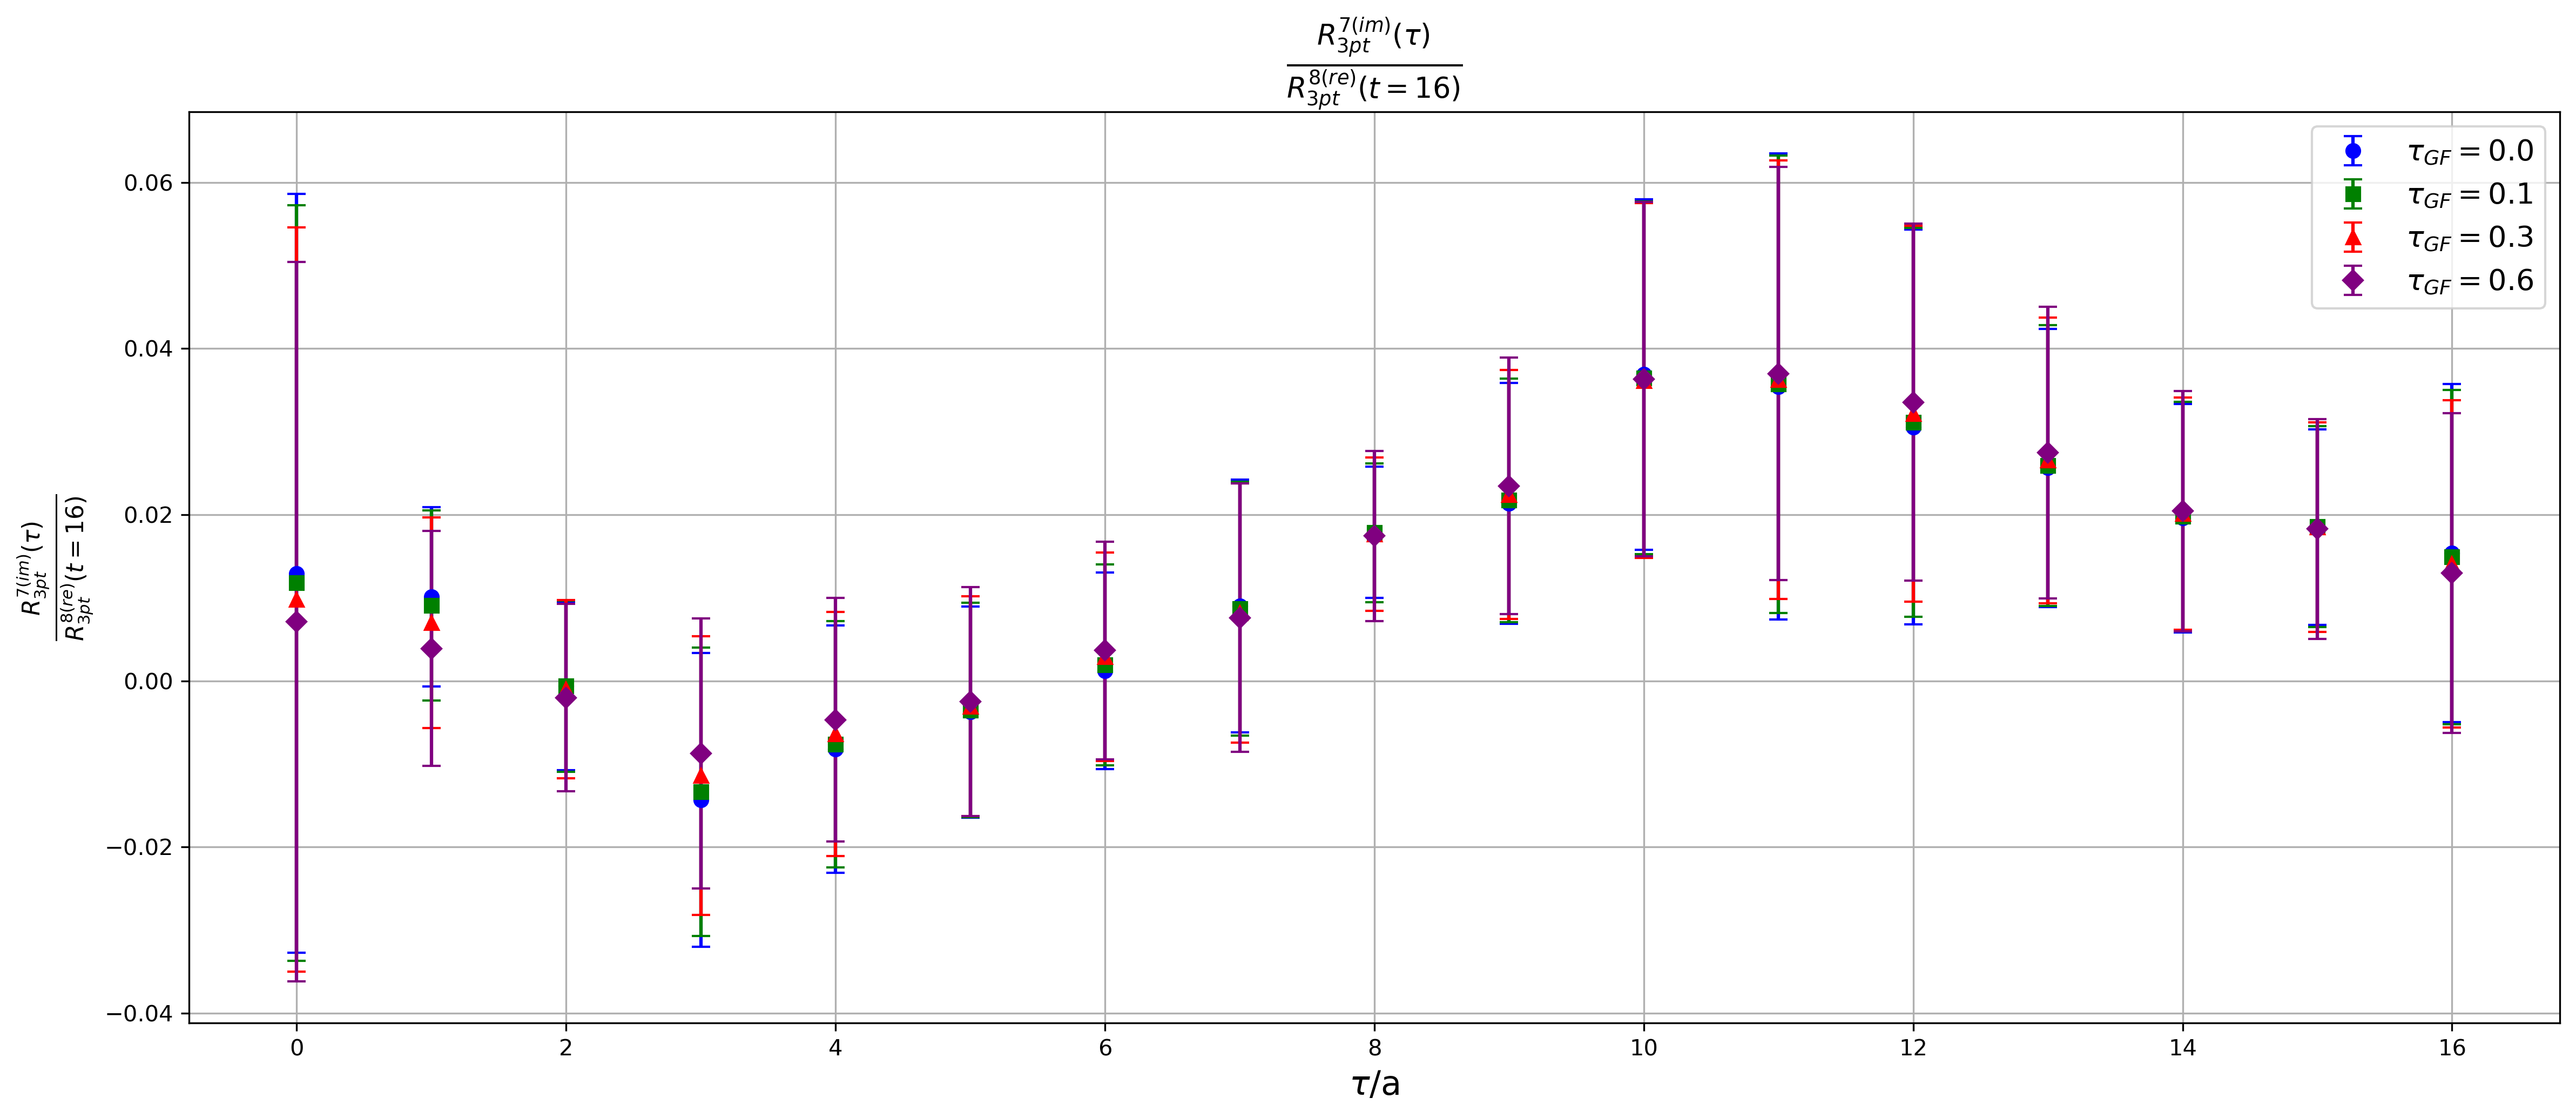

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
def Jackknife(datalist):
    N = len(datalist)
    theta_bar = np.mean(datalist)
    theta_nminus_theta_bar = []
    for i in range(len(datalist)): #Jackknife
        sliced_list = datalist[:(i)] + datalist[(i+1):]
        theta_n = np.mean(sliced_list)
        theta_nminus_theta_bar.append(np.square(theta_n-theta_bar))
    sigma_sq = ((N-1)/N)*np.sum(theta_nminus_theta_bar)
    return(theta_bar, np.sqrt(sigma_sq))


def plot_all_flows(Ax_Gn, Ax_Num, Ve_Gn, Ve_Num, snk_time):
    flow_times = ["0p0", "0p1", "0p3", "0p6"]
    tau_GF = [0.0, 0.1, 0.3, 0.6]
    colors = ['blue', 'green', 'red', 'purple']
    markers = ['o', 's', '^', 'D']

    plt.figure(figsize=(16, 7), dpi=300)

    for i, WFt in enumerate(flow_times):
        # Load 3pt data
        Ax_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_t{snk_time}_pion3pt.h5"
        with h5py.File(Ax_file_path, "r") as h5_file:
            Ax_path_to_observable_cfgb = f"//pion_l0_g{Ax_Gn}_qz+0_qy+0_qx+0/001"
            Ax_observable_cfgb = h5_file[Ax_path_to_observable_cfgb]
            Ax_values = Ax_observable_cfgb[Ax_Num][()]
        Ax_pt3_data = np.array(Ax_values)
        Ax_pt3_data1 = Ax_pt3_data[0:(snk_time+1)]
        Ax_pt3_data2 = Ax_pt3_data[42:(42+(snk_time+1))]
        Ax_pt3_data3 = Ax_pt3_data[84:(84+(snk_time+1))]

        Ve_file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/WF{WFt}_t{snk_time}_pion3pt.h5"
        with h5py.File(Ve_file_path, "r") as h5_file:
            Ve_path_to_observable_cfgb = f"//pion_l0_g{Ve_Gn}_qz+0_qy+0_qx+0/001"
            Ve_observable_cfgb = h5_file[Ve_path_to_observable_cfgb]
            Ve_values = Ve_observable_cfgb[Ve_Num][()]
        Ve_pt3_data = np.array(Ve_values)
        Ve_pt3_data1 = Ve_pt3_data[0:(snk_time+1)]
        Ve_pt3_data2 = Ve_pt3_data[42:(42+(snk_time+1))]
        Ve_pt3_data3 = Ve_pt3_data[84:(84+(snk_time+1))]

        

        # Compute jackknife
        JK_value = []
        JK_err = []
        for tau in range(len(Ax_pt3_data1)):
            JK_value_err = Jackknife([Ax_pt3_data1[tau]/Ve_pt3_data1[tau],
                                      Ax_pt3_data2[tau]/Ve_pt3_data2[tau],
                                      Ax_pt3_data3[tau]/Ve_pt3_data3[tau]])
            JK_value.append(JK_value_err[0])
            JK_err.append(JK_value_err[1])

        time_plt = np.arange(len(Ax_pt3_data1))
        plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt=markers[i], markersize=6,
                     capsize=4, color=colors[i], label=f"$\\tau_{{GF}} = {tau_GF[i]}$")

    # Final plot settings
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("$\\frac{{R^{%s ({%s})}_{3pt}(\\tau)}}{{R^{%s ({%s})}_{3pt}(t={%s})}}$"%(Ax_Gn, Ax_Num, Ve_Gn, Ve_Num,snk_time), fontsize=15)
    plt.title("$\\frac{{R^{%s ({%s})}_{3pt}(\\tau)}}{{R^{%s ({%s})}_{3pt}(t={%s})}}$"%(Ax_Gn, Ax_Num, Ve_Gn, Ve_Num,snk_time), fontsize=18)
    plt.legend(fontsize=13)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f"ReG8_all_flows_t{snk_time}.pdf", dpi=500)
    plt.show()


plot_all_flows(7, "im",8, "re", 16)